In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [2]:
import numpy.linalg as LA
class Node():
    def __init__(self, position, parent=None):
        self.position = np.array(position)
        self.parent = parent
    def __sub__(self, other):
        return LA.norm(self.position - other.position)
    
    def __repr__(self):
        return 'pos:{0}'.format(self.position)
    
    def pprint(self):
        plt.gca().scatter(self.position[0], self.position[1])
        plt.xlim([0,10])
        plt.ylim([0,10])

In [7]:
class RRT():
    def __init__(self, start=None, end=None, smpl_area=[0,10,0,10], distance=0.1, obstacles=None):
        self.smpl_area = smpl_area # xmin, xmax, ymin, ymax
        self.distance = distance
    
    
    def get_rnd_node(self):
        smpl_area = self.smpl_area
        area_min = np.array([smpl_area[0], smpl_area[2]])
        area_scale = np.array([(smpl_area[1] - smpl_area[0]), (smpl_area[3] - smpl_area[2])])
        rnd_num = np.array([random.random(), random.random()])
        rnd_smpl_pos = rnd_num * area_scale + area_min
        return Node(rnd_smpl_pos)
    

    def is_goal_near(self, node, margin=0.5):
        if node-self.end < margin:
            return True
        return False
    
    @staticmethod
    def plot_tree(tree):
        ax = plt.gca()
        for node in tree:
            if node.parent:
                pts = np.array([node.position, node.parent.position])
                ax.plot(*pts.T, color='k')
            #node.pprint()
    @staticmethod
    def plot_obstacles(obs_list):
        ax = plt.gca()
        for obs in obs_list:
            c = mpatches.Circle(obs[:2], obs[2], fc='k')
            ax.add_artist(c)
            
    @staticmethod
    def find_nearest_node(tree, rnd_node):
        distances = [rnd_node-node for node in tree]
        minidx = distances.index(min(distances))
        return tree[minidx]
    
    @staticmethod
    def is_collision(node, obstacles, margin=0.5):
        for obs in obstacles:
            obs_pos = np.array(obs[:2])
            obs_radius = obs[2]
            distance = LA.norm(node.position - obs_pos) - obs_radius - margin
            if distance < 0:
                return True
        return False
    
    @staticmethod
    def plot_final_path(node):
        ax = plt.gca()
        temp_node = node
        while temp_node.parent:
            pts = np.array([temp_node.position, temp_node.parent.position])
            ax.plot(*pts.T, color='r')
            temp_node = temp_node.parent
    

In [17]:
#init
rrt = RRT()
start_node = Node([5,5])
end_node = Node([1,0.5])
rrt.start = start_node
rrt.end = end_node
tree = [start_node]
obstacles = [(4,8,1), (6,4,1)]

In [18]:
for i in range(500):
    rnd_node = rrt.get_rnd_node()
    nearest_node = rrt.find_nearest_node(tree, rnd_node)
    diff = (rnd_node.position - nearest_node.position)
    new_node_pos = nearest_node.position + diff/LA.norm(diff) * 0.5
    new_node = Node(new_node_pos, parent=nearest_node)
    
    # collision check
    if not rrt.is_collision(new_node, obstacles, margin=0.1):
        tree.append(new_node)
    if rrt.is_goal_near(new_node):
        print('goal')
        goal_node = new_node


goal
goal


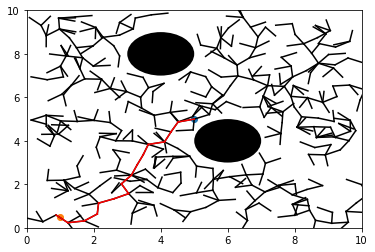

In [19]:
rrt.start.pprint()
rrt.end.pprint()
rrt.plot_tree(tree)
rrt.plot_obstacles(obstacles)
rrt.plot_final_path(goal_node)